Dataset available at: https://www.kaggle.com/uciml/pima-indians-diabetes-database

# Prepare Problem

## a) Load libraries 

In [222]:
# load libraries
import numpy
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings("ignore")

## b) Load dataset

In [223]:
# load data
dataset = read_csv("diabetes.csv")

# Summarize Data

## a) Descriptive statistics

In [224]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [225]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [226]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## b) Data visualizations

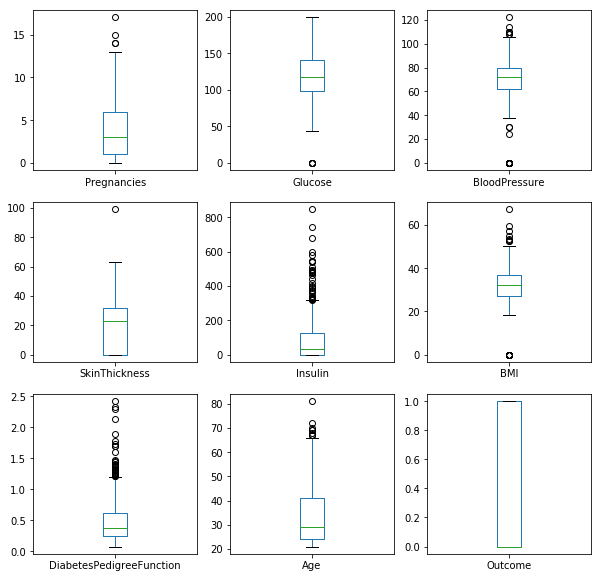

In [227]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
pyplot.show()

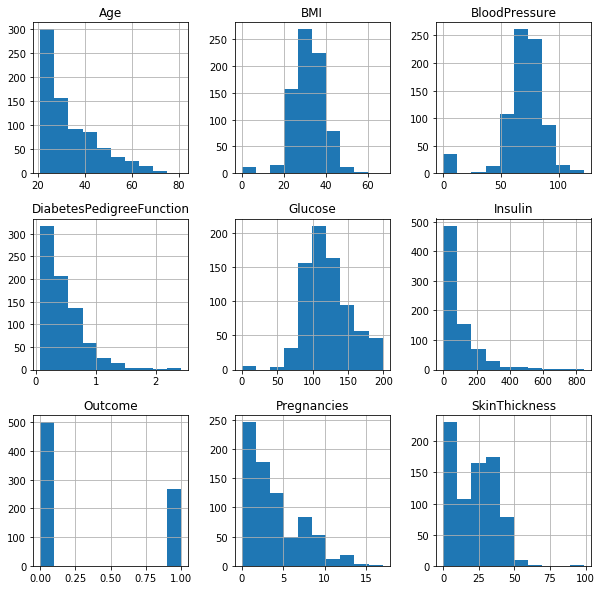

In [228]:
#histograms
dataset.hist(figsize=(10,10))
pyplot.show()

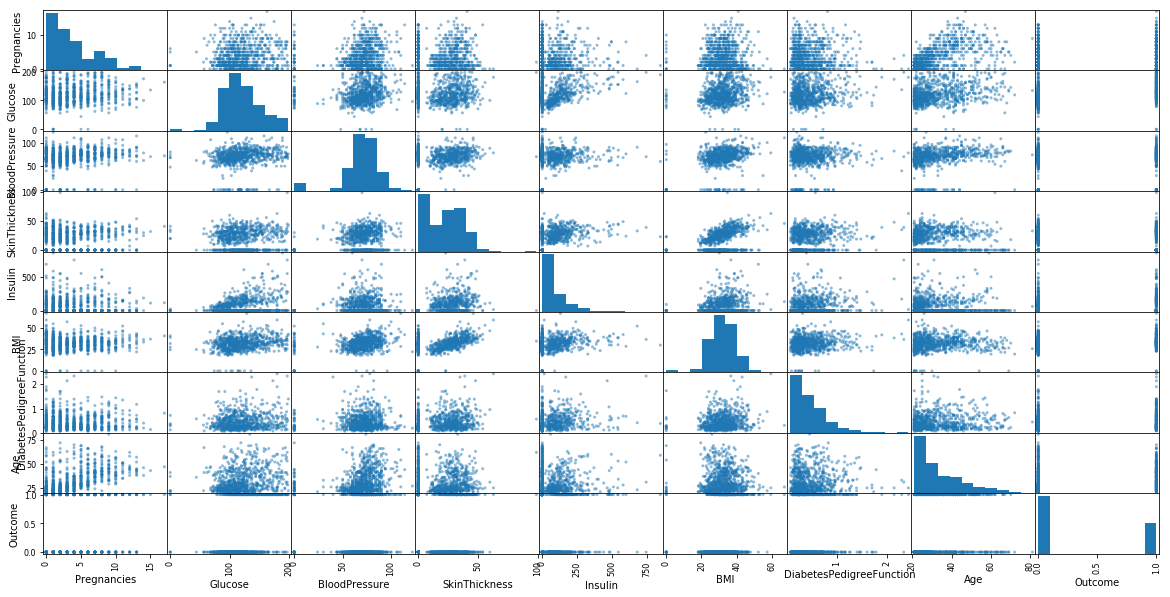

In [229]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(20,10))
pyplot.show()

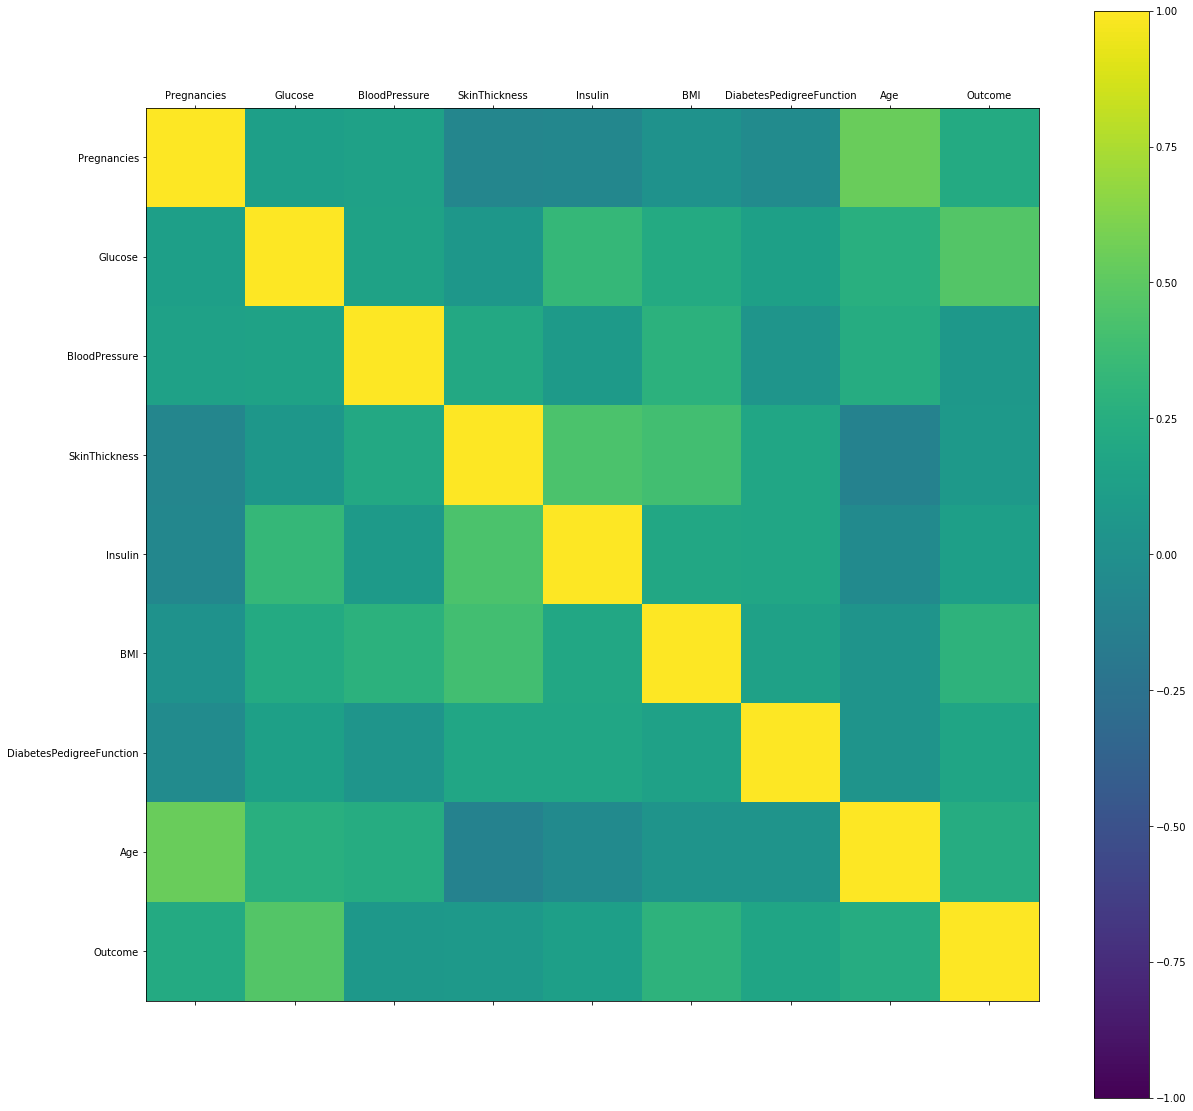

In [230]:
# correlation matrix
fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation="none")
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset)
ax.set_yticklabels(dataset)
pyplot.show()

# Evaluate Algorithms 

In [231]:
# split data into X and y
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

In [232]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [233]:
# CV model
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
model

[0]	validation_0-error:0.22179	validation_0-logloss:0.655154	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623321	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596815	validation_1-error:0.26378	validation_1-logloss:0.612239
[3]	validation_0-error:0.200389	validation_0-logloss:0.574026	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507801	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-l

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502673
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503697
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# Save and load trained model

In [234]:
# save model to file
pickle.dump(model, open("pima.pickle.dat", "wb"))
print("Saved model to: pima.pickle.dat")

Saved model to: pima.pickle.dat


In [235]:
# some time later
# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
print("Loaded model from: pima.pickle.dat")

Loaded model from: pima.pickle.dat


# Validation

In [236]:
# make predictions for test data
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [237]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


# Feature importance and feature selection

In [238]:
# feature importance
model.feature_importances_

array([0.07094595, 0.1858108 , 0.08952703, 0.08445946, 0.07263514,
       0.16047297, 0.12837838, 0.20777027], dtype=float32)

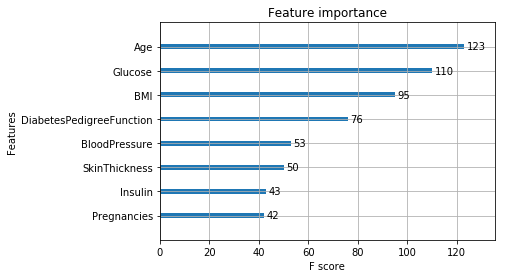

In [239]:
# plot feature importance
plot_importance(model)
pyplot.show()

In [240]:
# Fit model using each feature importance score as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.071, n=8, Accuracy: 77.95%
Thresh=0.073, n=7, Accuracy: 76.38%
Thresh=0.084, n=6, Accuracy: 77.56%
Thresh=0.090, n=5, Accuracy: 76.38%
Thresh=0.128, n=4, Accuracy: 76.38%
Thresh=0.160, n=3, Accuracy: 74.80%
Thresh=0.186, n=2, Accuracy: 71.65%
Thresh=0.208, n=1, Accuracy: 63.78%


# Monitor training performance and early stopping 

## Evaluate model with learning curves 

In [241]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

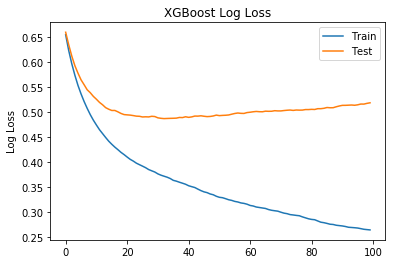

In [242]:
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

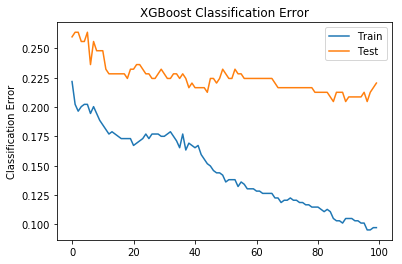

In [243]:
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## Early stopping 

In [244]:
# fit model to training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss",
eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895
